<div style="float: right;">
<img src="files/matchup.png" width="200"/>
</div>

# NBA Sports Betting 

## An analysis of stake percentage versus wager percentage

In attempting to spot sharp action on a game, bookies and sports bettors like to look at *percentage of bets* versus *percentage of wagers* being placed on a certain bet. For example, the odds for tonight's (2024-05-24) Minnesota Timberwolves and Dallas Mavericks game has the following displayed at [yahoo sports](https://sports.yahoo.com/nba/dallas-mavericks-minnesota-timberwolves-2024052416/):

<p style="text-align:center;"> <img src="files/odds.png" width="800" height="400"> </p>


This says that $16$ percent of the *Money Line* bets are being placed on the Mavericks, whereas $31$ percent of the total money being placed on the money line of tonight's game is on the Mavericks, a difference of $ 15 $ percent. On the other hand, the *Point Spread* has an oppising trend; The wolves are taking the majority of the action and an *even greater majority* of the money ($60$ versus $68$ percent). For the over/under, a whopping $96$ percent of the money and total wagers is on the *over*, but this is a common theme; the over is an overwhelmingly popular bet.

Although these differences  between pct total money wagered and pct of wagers aren't that big ($15 $ percent and $8$ percent), Bookies tend to look at these numbers to find out where the *big money* is being bet. Let's take a look at the data, which I have parsed from [yahoo sports api](https://sports.yahoo.com/nba/dallas-mavericks-minnesota-timberwolves-2024052416/).

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("spread_data_23-24.csv")

## Column info

- `date`
- `bet_type` - spread, ml, over o/u
- `home` - the home team abbreviation
- `away` - the away team abbreviation
- `team_abbrev` - the team abbreviation associated to the bet
- `americanOdds` - american odds ($-105$ means bet $105$ to win $100$)
- `decimalOdds` = the amount of units returned on a 1-unit wager 
- `stakePCT` - the total amount of money wagered on the bet
- `wagerPCT`- the total number of wagers placed on the bet
- `PLUS_MINUS` - the margin of victory
-  `Total` - the total points scored
-  `spread` - the pre-game spread
-  `WIN-LOSS-PUSH` - the bet result (1.0 = win, 0.0 = loss, 0.5 = push) 

In [9]:
df.head()

,date,bet_type,home,away,team_abbrev,americanOdds,decimalOdds,stakePCT,wagerPCT,PLUS_MINUS,Total,spread,WIN-LOSS-PUSH
0,2023-10-24,SPREAD,DEN,LAL,LAL,-105.0,1.95,56.91,50.69,-12.0,226.0,4.5,0.0
1,2023-10-24,SPREAD,DEN,LAL,DEN,-115.0,1.87,43.09,49.31,12.0,226.0,-4.5,1.0
2,2023-10-24,SPREAD,GSW,PHX,PHX,-105.0,1.95,35.46,47.82,4.0,212.0,2.5,1.0
3,2023-10-24,SPREAD,GSW,PHX,GSW,-115.0,1.87,64.54,52.18,-4.0,212.0,-2.5,0.0
4,2023-10-25,SPREAD,IND,WAS,WAS,-110.0,1.91,71.09,71.37,-23.0,263.0,4.5,0.0


Not all the games have stake and wager percentage data. Out of the $1230$ games played in the $2023$-$24$ regular season, let's see how many have non-null data.

In [11]:
df[(df['stakePCT'].isna())].shape

(602, 13)

There appear to be $602$ rows in the dataset with missing `stakePCT` data. Let's get rid of these rows.

In [12]:
df = df[(~df['stakePCT'].isna())]

In [14]:
df.head()

,date,bet_type,home,away,team_abbrev,americanOdds,decimalOdds,stakePCT,wagerPCT,PLUS_MINUS,Total,spread,WIN-LOSS-PUSH
0,2023-10-24,SPREAD,DEN,LAL,LAL,-105.0,1.95,56.91,50.69,-12.0,226.0,4.5,0.0
1,2023-10-24,SPREAD,DEN,LAL,DEN,-115.0,1.87,43.09,49.31,12.0,226.0,-4.5,1.0
2,2023-10-24,SPREAD,GSW,PHX,PHX,-105.0,1.95,35.46,47.82,4.0,212.0,2.5,1.0
3,2023-10-24,SPREAD,GSW,PHX,GSW,-115.0,1.87,64.54,52.18,-4.0,212.0,-2.5,0.0
4,2023-10-25,SPREAD,IND,WAS,WAS,-110.0,1.91,71.09,71.37,-23.0,263.0,4.5,0.0


In [15]:
import seaborn as sns
sns.set_style('darkgrid')

Let's see if there is a visible correlation between the `stakePCT` and `wagerPCT`. Let's only look at the rows corresponding to the home team, because there is redundant information in the away team's data.

<Axes: xlabel='wagerPCT', ylabel='stakePCT'>

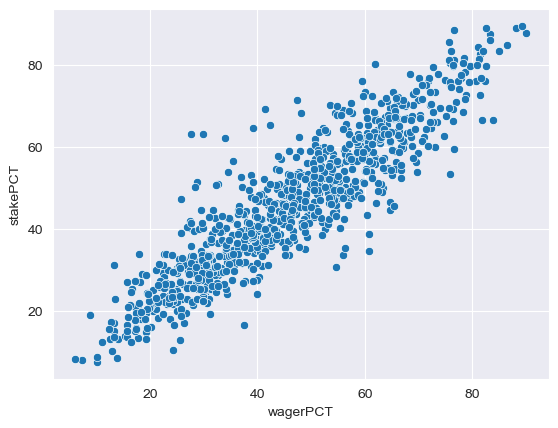

In [19]:
HOME_TEAM = df[(df['home'] == df['team_abbrev'])]
sns.scatterplot(HOME_TEAM, x ='wagerPCT', y = 'stakePCT')

In [21]:
HOME_TEAM.loc[:,['wagerPCT','stakePCT']].corr()

,wagerPCT,stakePCT
wagerPCT,1.000000,0.910714
stakePCT,0.910714,1.000000


There is clearly a positive correlation. Now let's look at the **difference** between the two  values. Let's make a `stakeDIFF` column and a `gameResultDIFF` column, which represents the *margin of victory against the spread*.

In [23]:
df['stakeDIFF'] = df['stakePCT']-df['wagerPCT']
df['gameResultDIFF'] = df['PLUS_MINUS'] + df['spread']

A positive `stakeDIFF` will signal that, on average, a bet placed on the team is bigger than a bet placed on the opponent. A negative `stakeDIFF` represents the other way around. Now let's see if there is a positive correllation between `stakeDIFF` and `gameResultDIFF`.  

<Axes: xlabel='stakeDIFF', ylabel='gameResultDIFF'>

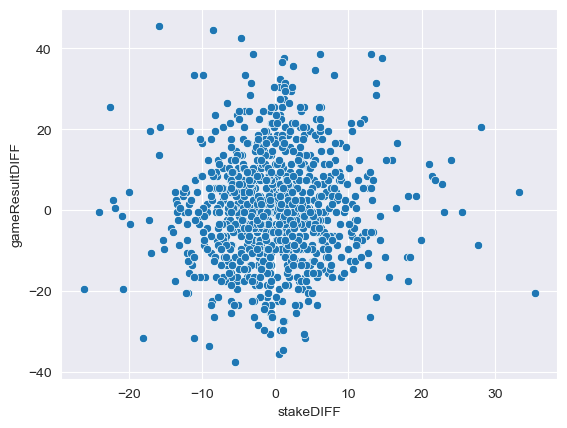

In [24]:
HOME_TEAM = df[(df['home'] == df['team_abbrev'])]
sns.scatterplot(HOME_TEAM, x ='stakeDIFF', y = 'gameResultDIFF')

In [25]:
HOME_TEAM.loc[:,['stakeDIFF','gameResultDIFF']].corr()

,stakeDIFF,gameResultDIFF
stakeDIFF,1.000000,0.055342
gameResultDIFF,0.055342,1.000000


There is only a small amount of correlation. However, let's check if there is more correlation among the times where the stakeDIFF is largely positive.

<Axes: xlabel='stakeDIFF', ylabel='gameResultDIFF'>

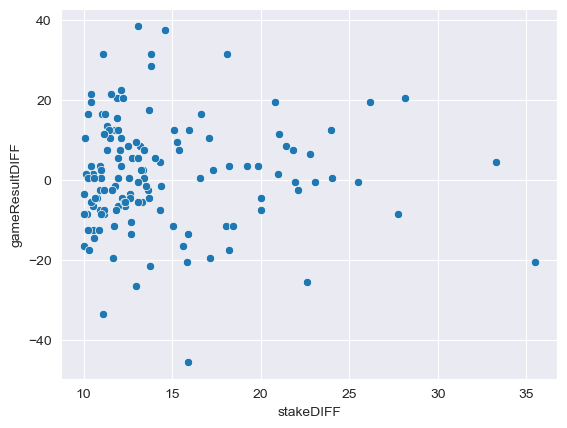

In [35]:
threshold = 10
Large_Gap = df[df['stakeDIFF']>threshold]
sns.scatterplot(Large_Gap, x ='stakeDIFF', y = 'gameResultDIFF')

Messing around with the numbers, we can see that, for the subset of games where `stakeDIFF` is bigger than 20, the results are quite substantial.

In [56]:
threshold = 10
Large_Gap = df[df['stakeDIFF']>threshold]
Large_Gap['WIN-LOSS-PUSH'].value_counts()

WIN-LOSS-PUSH
1.0    73
0.0    62
Name: count, dtype: int64

In [57]:
Large_Gap['WIN-LOSS-PUSH'].mean()

0.5407407407407407

In [58]:
threshold = 15
Large_Gap = df[df['stakeDIFF']>threshold]
Large_Gap['WIN-LOSS-PUSH'].mean()

0.5609756097560976

In [55]:
threshold = 5
Large_Gap = df[df['stakeDIFF']>threshold]
Large_Gap['WIN-LOSS-PUSH'].mean()

0.5267175572519084

As you can see, a team where `stakeDIFF` is greater than 10 covers 54% of the time. This is not that substantial of a result, but it does show that the money may be on the right team. More seasons' data needs to be analyzed before making conclusions. 